# **Exploratory Data Analysis - Terrorism**


> Dataset Used: [Global Terrorism Database](https://www.kaggle.com/datasets/START-UMD/gtd)



In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

## **Reading Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coders Cave Data Science_Internship/Global Terrorism/globalterrorismdb_0718dist.csv', encoding='latin-1')
df.head()

<ipython-input-4-da1c66342ada>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coders Cave Data Science_Internship/Global Terrorism/globalterrorismdb_0718dist.csv', encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# **Cleaning Dataset**
*   Filling 'NaN' Values with 0
*   Renaming Columns and converting them all in lower case





In [ ]:
df.fillna(0, inplace=True)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,0,58,Dominican Republic,2,...,0,0,0,0,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,...,0,0,0,0,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,...,0,0,0,0,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,...,0,0,0,0,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,0,101,Japan,4,...,0,0,0,0,PGIS,-9,-9,1,1,0


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.rename(columns={
    'iyear':'Year',
    'imonth':'Month',
    'iday':'Day',
    'country_txt':'Country',
    'provstate':'state',
    'region_txt':'Region',
    'attacktype1_txt':'AttackType',
    'target1':'Target',
    'nkill':'Killed',
    'nwound':'Wounded',
    'summary':'Summary',
    'gname':'Group',
    'targtype1_txt':'Target_type',
    'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
df=df[['Year',
       'Month','Day',
       'Country','state',
       'Region','city',
       'latitude','longitude',
       'AttackType','Killed',
       'Wounded','Target',
       'Summary','Group',
       'Target_type','Weapon_type',
       'Motive']]
df.columns = df.columns.str.lower()
df.head()

,year,month,day,country,state,region,city,latitude,longitude,attacktype,killed,wounded,target,summary,group,target_type,weapon_type,motive
0,1970,7,2,Dominican Republic,0,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown,0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary,0


# **EDA - Exploratory Data Analysis**
It includes find some informative analysis out of the dataset. Some questions that I would be concluding at the end of my analysis:

1.   In which year terrorist attacks were more?
3.   Top 5 Years with Maximum number of Casualties?
1.   Most targeted region of attackers?
1.   Which Region has more number of attacks?
2.   Total number of casualities, people killed and wounded in different Regions?
2.   Total number of casualities, people killed and wounded in different Countries?
2.   Total number of casualities, people killed and wounded in different Cities?
3.   Top Terrorist group attackers?
4.   Which attack type was mostly used for attacking?
3.   Which target type was affected badly?
3.   Which terrorist group is active in which country?
3.   Each Year wise active terrorists group in each country
3.   Global view of the attacks


> **Insights of the analysis**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   state        181691 non-null  object 
 5   region       181691 non-null  object 
 6   city         181691 non-null  object 
 7   latitude     181691 non-null  float64
 8   longitude    181691 non-null  float64
 9   attacktype   181691 non-null  object 
 10  killed       181691 non-null  float64
 11  wounded      181691 non-null  float64
 12  target       181691 non-null  object 
 13  summary      181691 non-null  object 
 14  group        181691 non-null  object 
 15  target_type  181691 non-null  object 
 16  weapon_type  181691 non-null  object 
 17  motive       181691 non-null  object 
dtypes: float64(4), int64(3),

In [ ]:
df.shape

(181691, 18)

In [ ]:
df.isnull().sum()

year           0
month          0
day            0
country        0
state          0
region         0
city           0
latitude       0
longitude      0
attacktype     0
killed         0
wounded        0
target         0
summary        0
group          0
target_type    0
weapon_type    0
motive         0
dtype: int64

**Creating a new feature for checking any casualty**

In [ ]:
df['casualty']=df['killed']+df['wounded']
df.head()

,year,month,day,country,state,region,city,latitude,longitude,attacktype,killed,wounded,target,summary,group,target_type,weapon_type,motive,casualty
0,1970,7,2,Dominican Republic,0,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown,0,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown,0,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,0,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives,0,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary,0,0.0


In [ ]:
df.describe()

,year,month,day,latitude,longitude,killed,wounded,casualty
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,22.909109,-4.471911e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.699442,2.021946e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,9.518645,1.231572e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.126646,4.314357e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.538561,6.835734e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# **1. In which year terrorist attacks were more?**

In [ ]:
df['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
attack=df['year'].value_counts(dropna=False).to_frame().reset_index()
attack.rename(columns={"index": 'year', 'year': 'num_attacks'}, inplace=True)
attack.set_index('year', inplace=True)
attack = attack.sort_values(by='num_attacks', ascending=False)
attack.head()

,num_attacks
year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900


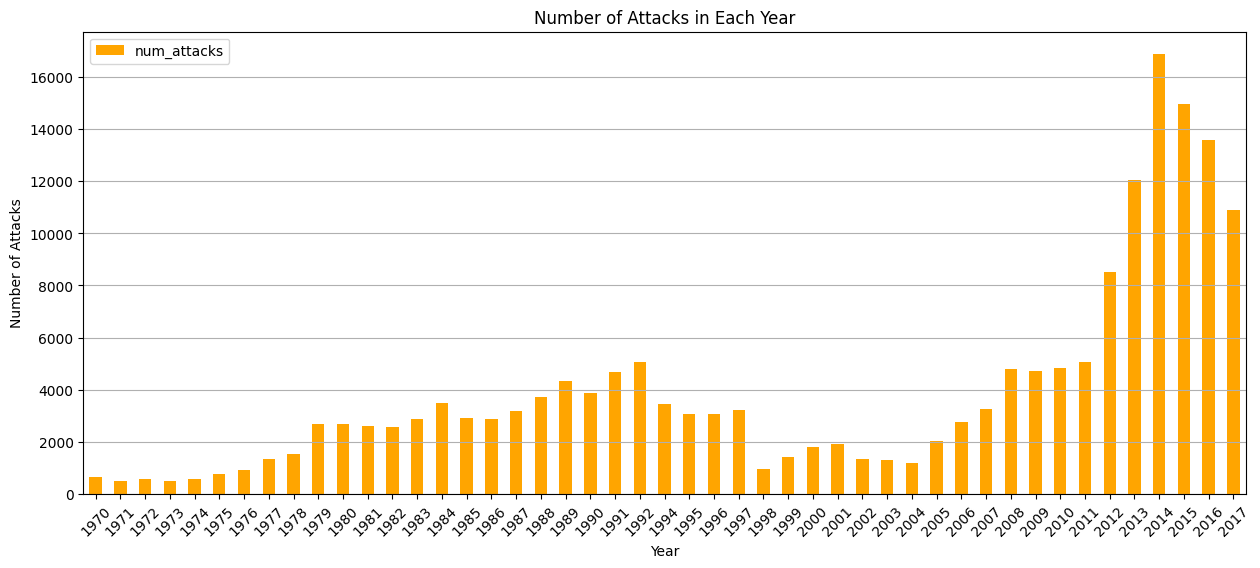

In [ ]:
attack=attack.sort_index()
attack.plot(kind='bar',color='orange', figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks in Each Year')

plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In year 2014 number of attacks by terrosrists were more.

# **2. Top 5 Years having Maximum number of Casualties?**

In [ ]:
cas = df.groupby('year')['casualty'].sum().reset_index()
cas.rename(columns={'year': 'year', 'casualty': 'casualty'}, inplace=True)
cas.set_index('year', inplace=True)
cas = cas.sort_values(by='casualty', ascending=False)
cas.head()

,casualty
year,
2014,85618.0
2015,82896.0
2016,74872.0
2013,59961.0
2017,51372.0


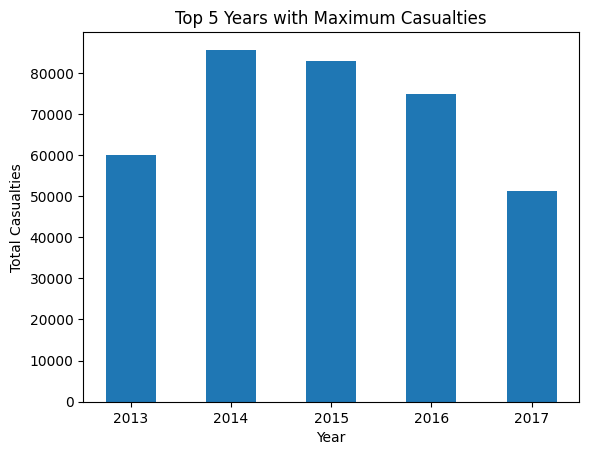

In [ ]:
cas_sorted = cas.sort_values(by='casualty', ascending=False)
top_5_years = cas_sorted.head(5)
fig=plt.bar(top_5_years.index, top_5_years['casualty'], width=0.5)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.title('Top 5 Years with Maximum Casualties')
plt.show()


# **3. Most targeted region of attackers?**

In [ ]:
# Max attacks in region
region_wise_attacks = df.groupby('region').size().reset_index(name='num_attacks')
region_wise_attacks.sort_values(by='num_attacks',ascending=False, inplace=True)
region_wise_attacks

,region,num_attacks
5,Middle East & North Africa,50474
8,South Asia,44974
7,South America,18978
10,Sub-Saharan Africa,17550
11,Western Europe,16639
9,Southeast Asia,12485
1,Central America & Caribbean,10344
4,Eastern Europe,5144
6,North America,3456
3,East Asia,802


In [ ]:
reg=pd.crosstab(df['year'],df['region'])
reg.head()

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


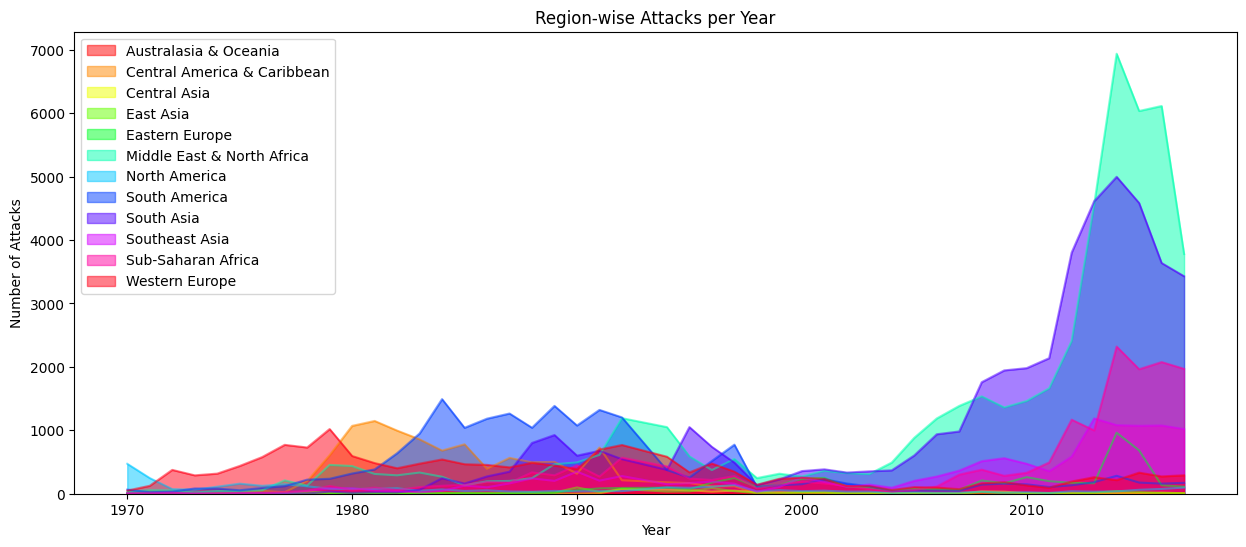

In [ ]:
reg.plot(kind='area', stacked=False, colormap='hsv',figsize=(15,6), alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Region-wise Attacks per Year')

plt.legend()
plt.show()


# **4. Which region has more number of attacks?**

In [ ]:
fig = px.line(
    region_wise_attacks,
    x='region',
    y='num_attacks',
    labels={'region': 'Region', 'num_attacks': 'Number of Attacks'},
    title='Number of Attacks in Each Region'
)

# Show the interactive plot
fig.show()

# **5. Total number of casualities, people killed and wounded in different regions?**

In [ ]:
region_casualty=df[['region','casualty']].groupby('region').sum().sort_values(by='casualty', ascending=False)
region_casualty

,casualty
region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


In [ ]:
region_killed=df[['region','killed']].groupby('region').sum().sort_values(by='killed', ascending=False)
region_killed

,killed
region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [ ]:
region_wounded=df[['region','wounded']].groupby('region').sum().sort_values(by='wounded', ascending=False)
region_wounded

,wounded
region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


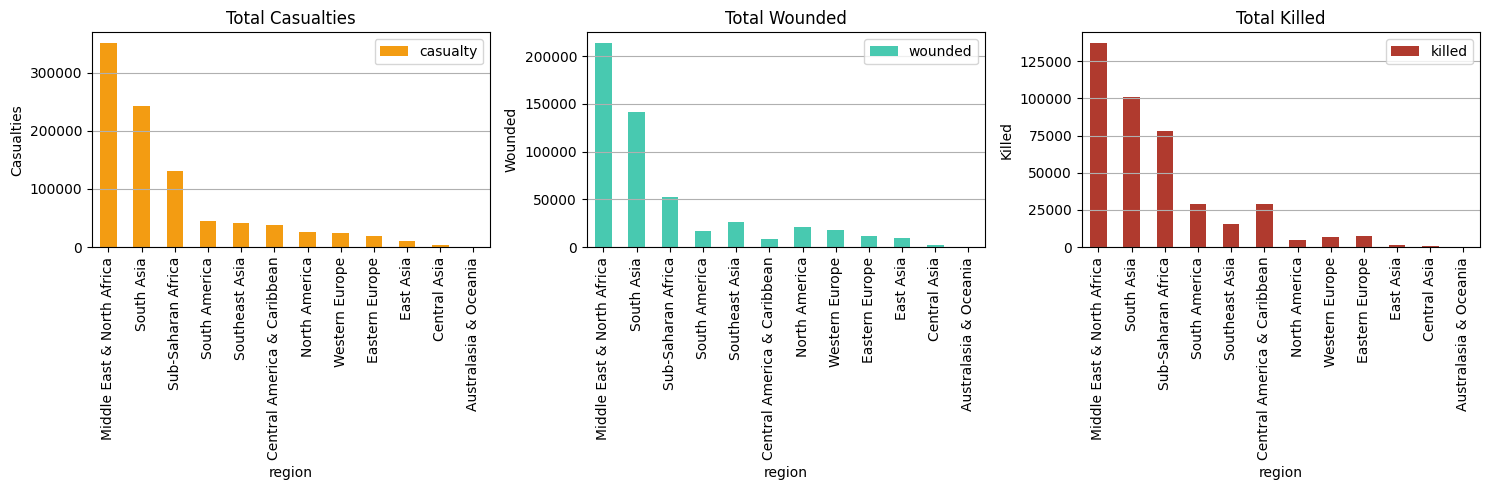

In [ ]:
top_regions = region_casualty.index.tolist()
colors = ['#F39C12', '#48C9B0', '#B03A2E']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Total casualties
region_casualty.loc[top_regions].plot(kind='bar', ax=axes[0], color=colors[0])
axes[0].set_title('Total Casualties')
axes[0].set_ylabel('Casualties')
axes[0].grid(axis='y')

# Total wounded
region_wounded.loc[top_regions].plot(kind='bar', ax=axes[1], color=colors[1])
axes[1].set_title('Total Wounded')
axes[1].set_ylabel('Wounded')
axes[1].grid(axis='y')

# Total killed
region_killed.loc[top_regions].plot(kind='bar', ax=axes[2], color=colors[2])
axes[2].set_title('Total Killed')
axes[2].set_ylabel('Killed')
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()


# **6. Total number of casualities, people killed and wounded in different countries?**

In [ ]:
country_cas=df[['country','casualty']].groupby('country').sum().sort_values(by='casualty', ascending=False)
country_cas

,casualty
country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
...,...
Wallis and Futuna,0.0
Falkland Islands,0.0
Andorra,0.0


In [ ]:
country_wounded=df[['country','wounded']].groupby('country').sum().sort_values(by='wounded', ascending=False)
country_wounded

,wounded
country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
...,...
Bahamas,0.0
South Vietnam,0.0
Montenegro,0.0


In [ ]:
country_killed=df[['country','killed']].groupby('country').sum().sort_values(by='killed', ascending=False)
country_killed

,killed
country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
...,...
St. Kitts and Nevis,0.0
Martinique,0.0
Brunei,0.0


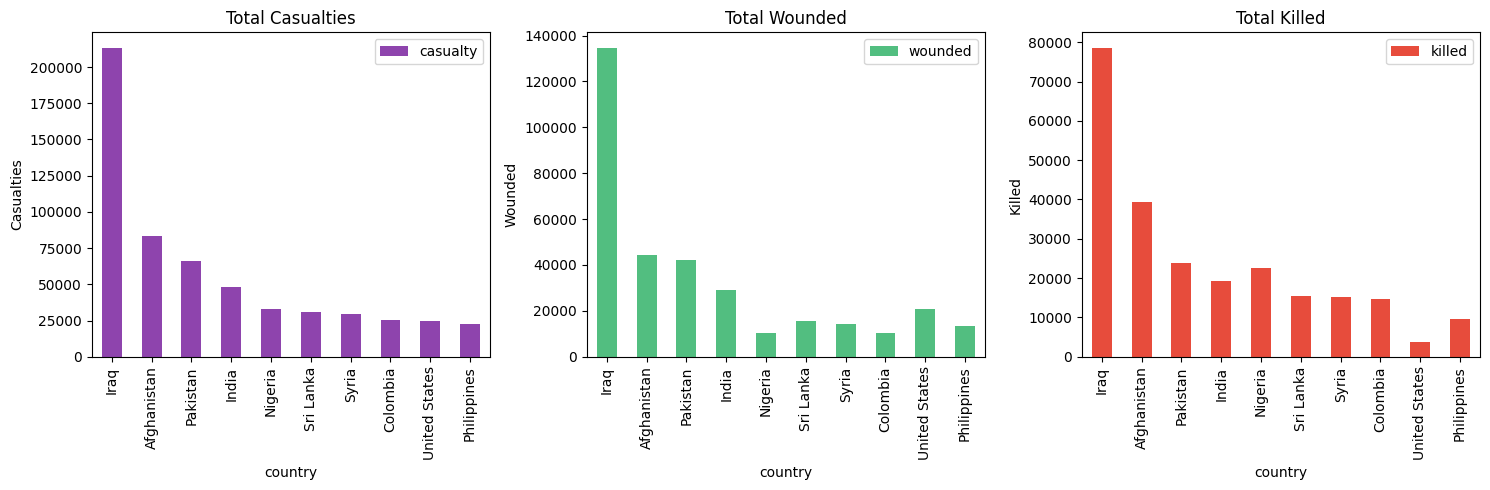

In [ ]:
top_countries = country_cas.head(10).index.tolist()
colors = ['#8E44AD', '#52BE80', '#E74C3C']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Total casualties
country_cas.loc[top_countries].plot(kind='bar', ax=axes[0], color=colors[0])
axes[0].set_title('Total Casualties')
axes[0].set_ylabel('Casualties')

# Total wounded
country_wounded.loc[top_countries].plot(kind='bar', ax=axes[1], color=colors[1])
axes[1].set_title('Total Wounded')
axes[1].set_ylabel('Wounded')

# Total killed
country_killed.loc[top_countries].plot(kind='bar', ax=axes[2], color=colors[2])
axes[2].set_title('Total Killed')
axes[2].set_ylabel('Killed')

plt.tight_layout()
plt.show()


# **7. Total number of casualities, people killed and wounded in different cities?**

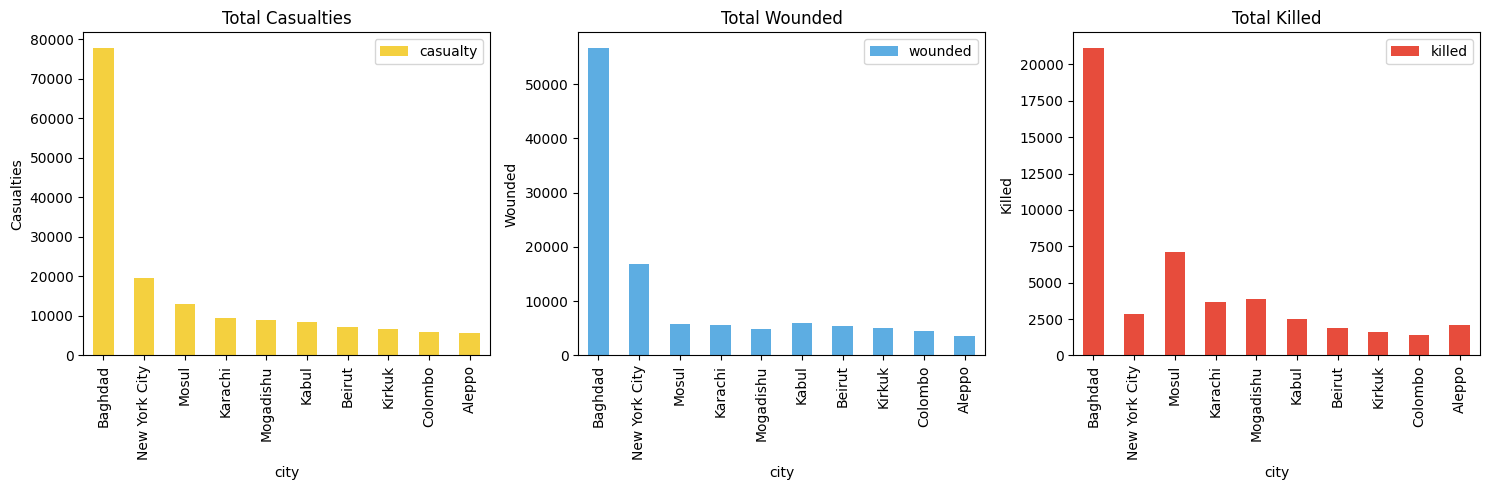

In [ ]:
city_cas=df[['city','casualty']].groupby('city').sum().sort_values(by='casualty', ascending=False)
city_wounded=df[['city','wounded']].groupby('city').sum().sort_values(by='wounded', ascending=False)
city_killed=df[['city','killed']].groupby('city').sum().sort_values(by='killed', ascending=False)

top_cities = city_cas[city_cas.index != 'Unknown'].head(10).index.tolist()

colors = ['#F4D03F', '#5DADE2', '#E74C3C']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Total casualties
city_cas.loc[top_cities].plot(kind='bar', ax=axes[0], color=colors[0])
axes[0].set_title('Total Casualties')
axes[0].set_ylabel('Casualties')

# Total wounded
city_wounded.loc[top_cities].plot(kind='bar', ax=axes[1], color=colors[1])
axes[1].set_title('Total Wounded')
axes[1].set_ylabel('Wounded')

# Total killed
city_killed.loc[top_cities].plot(kind='bar', ax=axes[2], color=colors[2])
axes[2].set_title('Total Killed')
axes[2].set_ylabel('Killed')

plt.tight_layout()
plt.show()


# **8. Top terrorists group attackers?**



> Maximum attacks by which terrorist group?



In [ ]:
terr_grp=df['group'].value_counts()[1:10]
terr_grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: group, dtype: int64



> Percentage of attack by each terrorist group?



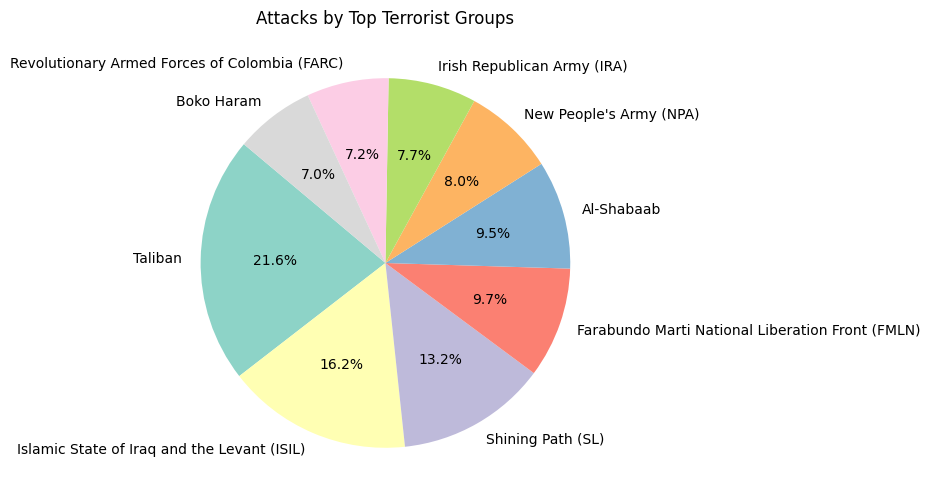

In [ ]:
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors
plt.pie(terr_grp, labels=terr_grp.index, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Attacks by Top Terrorist Groups')
plt.show()

# **9. Which attack type was mostly used for attacking?**

In [ ]:
#Attack Type
attack_type=df['attacktype'].value_counts().to_frame()
attack_type

,attacktype
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659




> Number of attacks done by each attack group



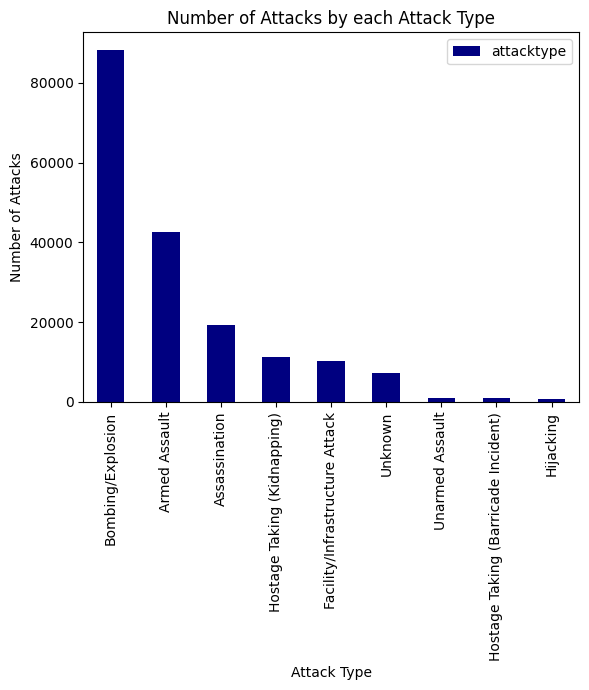

In [ ]:
attack_type.plot(kind='bar', color='navy')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by each Attack Type')
plt.xticks(rotation=90)
plt.show()

# **10. Which target type was affected badly?**

In [ ]:
target=df['target_type'].value_counts().to_frame()
target.head(5)

,target_type
Private Citizens & Property,43511
Military,27984
Police,24506
Government (General),21283
Business,20669


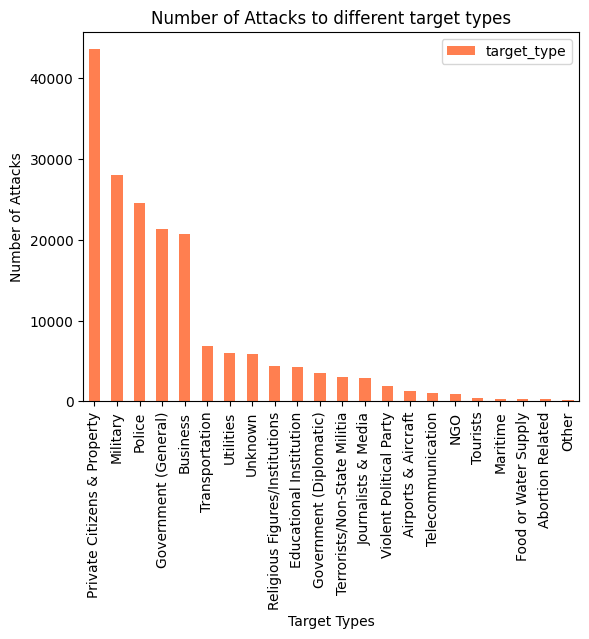

In [ ]:
target.plot(kind='bar', color='coral')
plt.xlabel('Target Types')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks to different target types')
plt.xticks(rotation=90)
plt.show()

# **11. Which Terrorist group is active in which county?**

In [ ]:
#Attack in each Country
country=df['country'].value_counts().to_frame()
country.sort_values(by='country', ascending=False)
country

,country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
...,...
International,1
Wallis and Futuna,1
South Vietnam,1
Andorra,1


In [ ]:
grouped = df.groupby(['country'])['group'].unique().apply(lambda x: [item for item in x if item != 'Unknown']).reset_index()
result_df = pd.DataFrame({
    'Country': grouped['country'],
    'Active_Terrorist_Groups': grouped['group']
})
result_df


,Country,Active_Terrorist_Groups
0,Afghanistan,"[Black December, Shia Muslim extremists, Musli..."
1,Albania,[Muslim extremists]
2,Algeria,[Popular Front for the Liberation of Palestine...
3,Andorra,[International Revolutionary Action Group (GARI)]
4,Angola,[Front for the Liberation of the Enclave of Ca...
...,...,...
200,Yemen,"[Bedouin tribesmen, Muslim Militants, Faqra Tr..."
201,Yugoslavia,"[Croatian Nationalists, Croatians, Justice Com..."
202,Zaire,"[Black September, Irish Republican Army (IRA),..."
203,Zambia,[Revolutionary Committee of Mozambique (COREMO...


# **12. Year wise active terrorists group**

In [ ]:
grouped = df.groupby(['country', 'year'])['group'].unique().apply(list).reset_index()
country_total_attacks = df.groupby('country')['year'].count().reset_index()
country_total_attacks.rename(columns={'year': 'Total_Attacks'}, inplace=True)
grouped = pd.merge(grouped, country_total_attacks, on='country', how='left')

grouped['group'] = grouped['group'].apply(lambda groups: [group for group in groups if group != 'Unknown'])
result_df = pd.DataFrame({
    'Country': grouped['country'],
    'Year': grouped['year'],
    'Active_Terrorist_Groups': grouped['group'],
    'Total_Attacks': grouped['Total_Attacks']
})

result_df = result_df.sort_values(by='Total_Attacks', ascending=False)
result_df.set_index('Year', inplace=True)
result_df.head(20)

,Country,Active_Terrorist_Groups,Total_Attacks
Year,,,
1997,Iraq,[Supreme Council for Islamic Revolution in Ira...,24636
2008,Iraq,"[Al-Qaida in Iraq, Al-Fatihin Army (AFA), Ansa...",24636
2001,Iraq,"[Kurdistan Workers' Party (PKK), Supreme Counc...",24636
2002,Iraq,[Supreme Council for Islamic Revolution in Ira...,24636
2003,Iraq,"[Ansar al-Islam, Armed Vanguards of a Second M...",24636
2004,Iraq,"[Tawhid and Jihad, Mahdi Army, Ansar al-Din, M...",24636
2005,Iraq,"[Iraqi extremists, Ansar al-Sunna, Al-Qaida in...",24636
2006,Iraq,"[Revenge Brigade, Al-Qaida in Iraq, Mujahedeen...",24636
2007,Iraq,"[Islamic State of Iraq (ISI), Sunni Muslim ext...",24636


# **Global view of the Terrorism**

In [ ]:
terr=df.groupby(['country'],as_index=False).count()

In [ ]:
fig=px.choropleth(terr,locations='country',locationmode='country names',
                  color='year',hover_name='country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'year'})
fig.show()

# **Insights from the analysis**

*   In 2014 year, maximum attacks were done by the attackers.
*   Year 2014, 2015, 2016, 2013, 2017 are the top 5 years with maximum casulaities.
*   In 2014 year, maximum attacks were done by the attackers.
*   Middle East & North Africa is the most targeted region of terrorists with 50474 number of attacks and in that region Iraq is mostly affected country.
*   Taliban is the most active terrorists group which has done number of attacks of 7478.
*   Most of the attacks were done by Bombing/Explosion by the terrorists.
*   Private Citizens & Property	were mostly affected by the attacks and after that Military was affected badly.
*   In 	1997, Iraq was attacked by these terrorist groups:
    1. Supreme Council for Islamic Revolution in Iraq (SCIRI)
    2. Kurdistan Workers' Party (PKK)
    3. Kurdish Democratic Party-Iraq (KDP)
    4. Patriotic Union of Kurdistan (PUK)










